# Data handling - R

## variables

In [5]:
cst<-3 ## num of log pop cluster determine log time clusters

## data input and pre-processing

In [3]:
## data cleaning
a<-read.csv("../data/LogisticGrowthData.csv", header = T, stringsAsFactors = F)[,-1]
  a<-a[,c(3,6:9,1,2,5)]
  colnames(a)=c("Temp.C","clade","substrate","replicate","SourceRef","Time.hr","Popn_Change","Popn_DataUnit")
  a$Time.hr<-abs(a$Time.hr) ## convert -ve times
  a$clade<-gsub(".1|.2|..RDA.R.","",a$clade) ## condense spp names
  a$clade<-gsub("spp.|sp.","sp",a$clade) ## condense spp names
  a$clade<-gsub("[.]"," ",a$clade) ## condense spp names
  a$clade<-gsub("77|88|Strain 97|StrainCYA28|subsp Carotovorum Pc","",a$clade) ## rm specific unnecessary things for better spp categorizing
  a$clade<-trimws(a$clade) ## condense spp names (rm white spaces from both ends)
  # levels(as.factor(a$clade))

In [4]:
## data subset selection -- select the largest data subset
  a.DU.lv<-levels(as.factor(a$Popn_DataUnit))
  a.Tp.lv<-levels(as.factor(a$Temp.C))
  a.cd.lv<-levels(as.factor(a$clade))
  a.ss.lv<-levels(as.factor(a$substrate))
  a.rp.lv<-levels(as.factor(a$replicate))
  a.ct.lv<-levels(as.factor(a$SourceRef))

In [6]:
## hierarchical selection of available subsets
  p.rec<-as.data.frame(matrix(nrow = 0, ncol = 6))
  cat("R Filtering 1st set of columns\n")
  p.2<-p.4<-p.6<-1;repeat{
    ## check repeat loop running num seq
    if(p.2==length(a.Tp.lv)){
      if(p.4==length(a.ss.lv)){
        if(p.6==length(a.ct.lv)){
          break
        }else{
          p.2<-p.4<-1
          p.6<-p.6+1
        }
      }else{
        p.2<-1
        p.4<-p.4+1
      }
    }else{
      p.2<-p.2+1
    }
    ## scan subset dimension
    p.7<-dim(a[which(a$Temp.C==a.Tp.lv[p.2] &
                       a$substrate==a.ss.lv[p.4] &
                       a$SourceRef==a.ct.lv[p.6]),])[1]
    if(p.7 > 0){p.rec[(dim(p.rec)[1]+1),]<-c(NA,p.2,NA,p.4,NA,p.6)}
  }
  p.recL<-dim(p.rec)[1]

R Filtering 1st set of columns


In [9]:
cat("R Filtering 2nd set of columns\n")
  p.1<-p.3<-p.5<-1;repeat{
    ## check repeat loop running num seq
    if(p.1==length(a.DU.lv)){
      if(p.3==length(a.cd.lv)){
        if(p.5==length(a.rp.lv)){
          break
        }else{
          p.1<-p.3<-1
          p.5<-p.5+1
        }
      }else{
        p.1<-1
        p.3<-p.3+1
      }
    }else{
      p.1<-p.1+1
    }
    ## scan subset dimension
    p.7<-dim(a[which(a$Popn_DataUnit==a.DU.lv[p.1] &
                       a$clade==a.cd.lv[p.3] &
                       a$replicate==a.rp.lv[p.5]),])[1]
    if(p.7 > 0){p.rec[(dim(p.rec)[1]+1),]<-c(p.1,NA,p.3,NA,p.5,NA)}
  }
  a.0<-as.data.frame(matrix(nrow = 0,ncol = dim(a)[2]))

R Filtering 2nd set of columns


In [10]:
cat("R Combine filtering result\n")
  for(i in 1:p.recL){ ## further select for subset with largest data points
    for(j in (p.recL):dim(p.rec)[1]){
      p.7<-a[which(a$Popn_DataUnit==a.DU.lv[p.rec[j,1]] &
                     a$Temp.C==a.Tp.lv[p.rec[i,2]] &
                     a$clade==a.cd.lv[p.rec[j,3]] &
                     a$substrate==a.ss.lv[p.rec[i,4]] &
                     a$replicate==a.rp.lv[p.rec[j,5]] &
                     a$SourceRef==a.ct.lv[p.rec[i,6]]),]
      if(dim(p.7)[1] > dim(a.0)[1]){a.0<-p.7}
    }
  };rm(i,j)
  rm(list=ls(pattern="p.|.lv"))

R Combine filtering result


In [11]:
## subsetted data export
cat("R Writing data\n")
aa<-data.frame("logTime"=log(a.0[,6]),"logPop"=log(a.0[,7]),a.0[,6:7])

R Writing data


## time-population clustering definitions

In [14]:
## data clustering: can't use k-mean (min in-cluster mean distance)
aa$cluster<-ifelse(aa$Time.hr<10,1,ifelse(aa$Time.hr>150,3,2))
write.csv(aa,"../data/Log_data.csv",quote = F, row.names = F)

## trial cluster plots

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

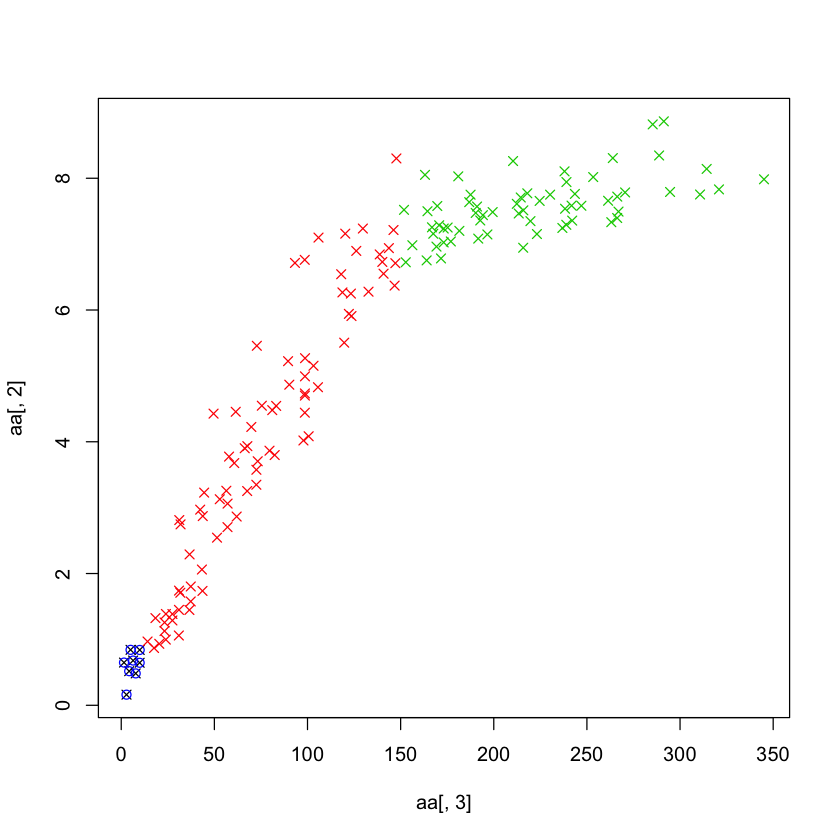

In [18]:
## visual cluster plot
b<-aa[which(aa$cluster==1),]
plot(x=aa[,3], y=aa[,2], col=as.factor(aa$cluster),pch=4)
points(x=b[,3], y=b[,2], add=T, col="blue")
rm(b)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

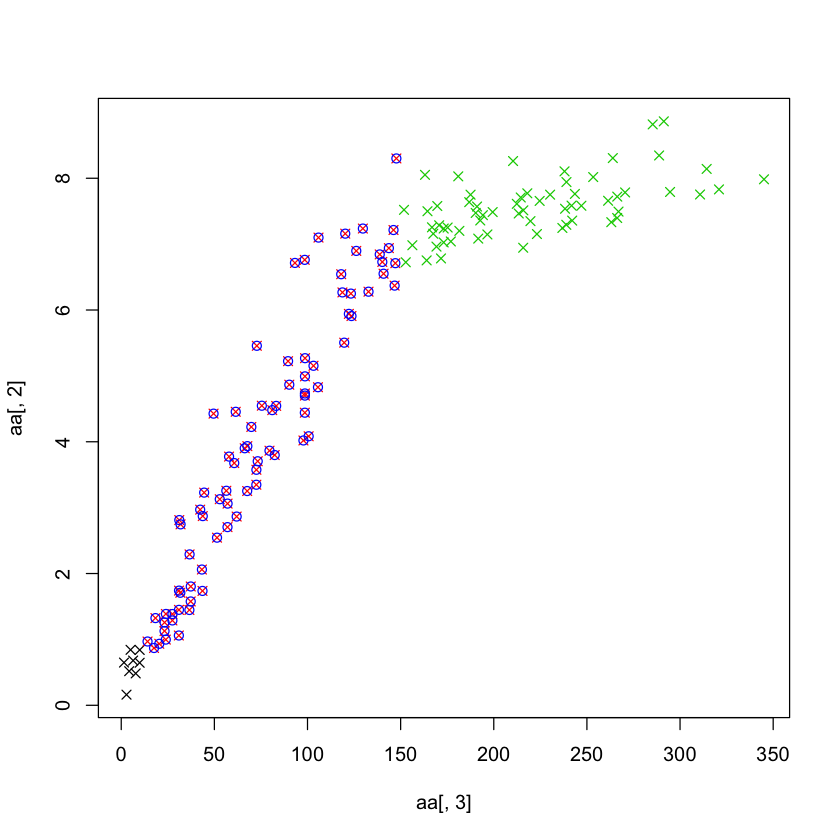

In [19]:
## visual cluster plot
b<-aa[which(aa$cluster==2),]
plot(x=aa[,3], y=aa[,2], col=as.factor(aa$cluster),pch=4)
points(x=b[,3], y=b[,2], add=T, col="blue")
rm(b)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

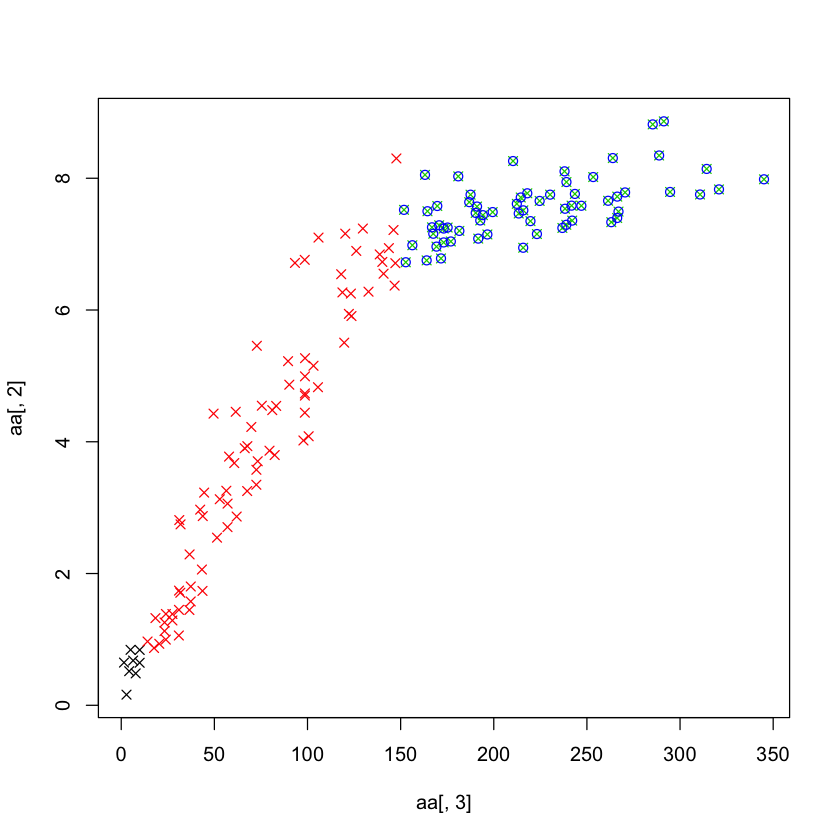

In [20]:
## visual cluster plot
b<-aa[which(aa$cluster==3),]
plot(x=aa[,3], y=aa[,2], col=as.factor(aa$cluster),pch=4)
points(x=b[,3], y=b[,2], add=T, col="blue")
rm(b)

In [21]:
## data description
  a.md<-data.frame(colnames(a.0)[-c(6,7)],t(a.0[1,-c(6,7)]),stringsAsFactors = F)
  row.names(a.md)=NULL
  # colnames(a.md)=c("Metadata","Content")
  a.md<-rbind(a.md,c("Subset sample size",dim(a.0)[1]))
  a.md<-rbind(a.md,c("Normality of log Population Change",round(shapiro.test(log(a.0$Popn_Change))$p.value,2)))
  a.md<-rbind(a.md,c("Normality of log time of experiment",round(shapiro.test(log(a.0$Time.hr))$p.value,2)))
  k<-0;for(i in 1:2){j<-ifelse(i<2,"Time.hr","Population Change");k<-c(k,paste0(c("Min", "1stQt","Median","3rdQt","Max"),"_",j))};rm(i,j)
  a.md<-data.frame(c(a.md[,1],k[-1]),c(a.md[,2],round(fivenum(a.0$Time.hr),2),round(fivenum(log(a.0$Popn_Change)),2)));rm(k)
  for(i in 1:dim(a.md)[2]){a.md[,i]<-as.character(a.md[,i])};rm(i) ## class issue
  j.0<-c("N0", "log", "K");for(i in 1:3){
    a.md<-rbind(a.md,c(paste("Population change Mean of cluster",j.0[i]),round(mean(aa[which(aa$cluster==i),4]),2))) ## raw data before log
  };rm(i)

## data exporting

In [22]:
write.table(a.md[c(1:6),],"../data/Log_DataSource.txt",quote = F, row.names = F, sep = "\t",col.names = F)
write.table(a.md[-5,],"../data/Log_Metadata.txt",quote = F, row.names = F, sep = "\t",col.names = F)

# NLLS - R

# NLLS - py3

# Data plotting - R